<a href="https://colab.research.google.com/github/yeachanyun/AutoTradingSystem/blob/master/%EC%9C%A4%EC%98%88%EC%B0%AC/Getting_Stock_Data_CSVs_and_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas_datareader.data as web

import matplotlib.pyplot as plt

In [ ]:
def get_stock_data_train_test_split(
      code
    , start_date
    , end_date
    , train_size=0.8
    ):
    """
    Retrieves filtered stock dataframe using yahoo finance 
    and saves to train/test csv.

    - code: the ticker symbol
      * example: '000000.KS' / '000000.KQ' / 'ABCD'
      * KS = KOSPI, KQ = KOSDAQ
    - start_date, end_date: datetime range of stock data (yyyy-mm-dd)
    """
    stock_df = web.DataReader(
        '%s' % code
        , 'yahoo'
        , start_date
        , end_date
    )
    stock_df.reset_index(level=0, inplace=True)
    stock_df['Date'] = np.log1p(stock_df['Date'].astype(int))
    stock_df['Target'] = stock_df['Close'].shift(-1)
    stock_df.drop(stock_df.tail(1).index, inplace=True)

    X_features = stock_df.drop('Target', axis=1)
    y_target = stock_df['Target']

    X_train, X_test, y_train, y_test = train_test_split(
        X_features
        , y_target
        , train_size=train_size
        , random_state=0
        , shuffle=False
    )

    stock_df.to_csv('data/%s.csv' % code)

    return stock_df, X_train, X_test, y_train, y_test

In [ ]:
def show_mv_avg_chart(stock_df):
    """
    Shows Adj. Close and 5, 20, 60, 120 days of 
    moving average portfolios to single chart.

    - stock_df: Dataframe created from pandas_datareader
    """
    mv_avg_5 = stock_df['Close'].rolling(window=5).mean()
    mv_avg_20 = stock_df['Close'].rolling(window=20).mean()
    mv_avg_60 = stock_df['Close'].rolling(window=60).mean()
    mv_avg_120 = stock_df['Close'].rolling(window=120).mean()

    plt.figure(figsize=(20,10))

    plt.plot(stock_df.index, stock_df['Close'], label='Close')
    plt.plot(stock_df.index, mv_avg_5, label='MA5')
    plt.plot(stock_df.index, mv_avg_20, label='MA20')
    plt.plot(stock_df.index, mv_avg_60, label='MA60')
    plt.plot(stock_df.index, mv_avg_120, label='MA120')

    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [ ]:
stock_df, X_train, X_test, y_train, y_test = get_stock_data_train_test_split(
    '000020.KS'
    , '2000-01-01'
    , '2020-01-01'
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 0 to 4919
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4920 non-null   float64
 1   High       4920 non-null   float64
 2   Low        4920 non-null   float64
 3   Open       4920 non-null   float64
 4   Close      4920 non-null   float64
 5   Volume     4920 non-null   float64
 6   Adj Close  4920 non-null   float64
 7   Target     4920 non-null   float64
dtypes: float64(8)
memory usage: 345.9 KB


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

print(r2_score(y_test, pred))

0.9691127552430528


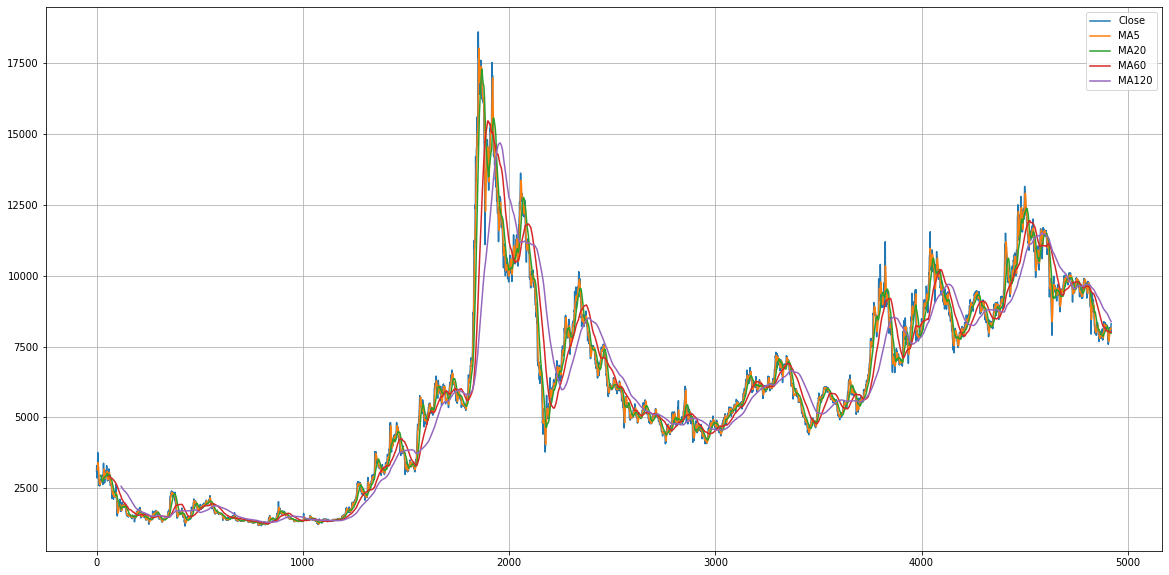

In [ ]:
show_mv_avg_chart(stock_df)